![](https://images.pexels.com/photos/1438248/pexels-photo-1438248.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)

# Anaglyphs with Stereo Image Pairs using OpenCV

Kevin J. Walchko, Phd

19 Apr 2020

---

![](pics/glasses.png)

Anaglyph 3D is the name given to the stereoscopic 3D effect achieved by means of encoding each eye's image using filters of different (usually chromatically opposite) colors, typically red and cyan. Anaglyph 3D images contain two differently filtered colored images, one for each eye. When viewed through the "color-coded" "anaglyph glasses", each of the two images reaches the eye it's intended for, revealing an integrated stereoscopic image. The visual cortex of the brain fuses this into the perception of a three-dimensional scene or composition.

### Example

![](anaglyph_sample.png)

In [1]:
import numpy as np
import cv2

In [3]:
%matplotlib inline 
from matplotlib import pyplot as plt

In [2]:
# declare various color blending algorithms to mix te pixels
# from different perspectives so that red/blue lens glasses
# make the image look 3D
mixMatrices = {
    'true': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 0, 0, 0.299, 0.587, 0.114 ] ],
    'mono': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0.299, 0.587, 0.114, 0.299, 0.587, 0.114 ] ],
    'color': [ [ 1, 0, 0, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
    'halfcolor': [ [ 0.299, 0.587, 0.114, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
    'optimized': [ [ 0, 0.7, 0.3, 0, 0, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 1, 0, 0, 0, 1 ] ],
}

# blends two RGB image pairs into a single image that will be perceived as
# 3d when using red/blue glasses
# inputs:
#   leftImage -- an image that corresponds to the left eye
#   rightImage -- an image that corresponds to the right eye
#   color -- a string that specifies a blending strategy by indexing into mixMatrices
# returns:
#   anaglyph image
def anaglyphBGR(leftImage, rightImage, color):
    # use the color argument to select a color separation formula from mixMatrices
    if color in mixMatrices:
        m = mixMatrices[color]
    else:
        print('invalid color mixMatrix: {}'.format(color))
        return None

    h,w = leftImage.shape[:2]
    result = np.zeros((h,w,3), np.uint8)

    # split the left and right images into separate blue, green and red images
    lb,lg,lr = cv2.split(np.asarray(leftImage[:,:]))
    rb,rg,rr = cv2.split(np.asarray(rightImage[:,:]))
    resultArray = np.asarray(result[:,:])
    resultArray[:,:,0] = lb*m[0][6] + lg*m[0][7] + lr*m[0][8] + rb*m[1][6] + rg*m[1][7] + rr*m[1][8]
    resultArray[:,:,1] = lb*m[0][3] + lg*m[0][4] + lr*m[0][5] + rb*m[1][3] + rg*m[1][4] + rr*m[1][5]
    resultArray[:,:,2] = lb*m[0][0] + lg*m[0][1] + lr*m[0][2] + rb*m[1][0] + rg*m[1][1] + rr*m[1][2]

    return result

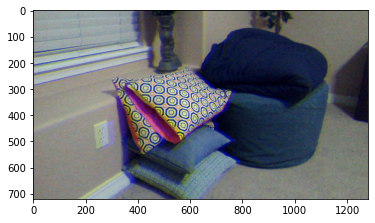

In [7]:
# read in the image and split out the left/right
img = cv2.imread('src-imgs/image-0.png')

h,w = img.shape[:2]
leftImage = img[:,:w//2]
rightImage = img[:,w//2:]

# make an anaglyph
anaglyphImage = anaglyphBGR(leftImage, rightImage, color='color')

plt.imshow(anaglyphImage);